<a href="https://colab.research.google.com/github/cysorianoc/IBM_MACHINE_LEARNING_COURSE_2/blob/main/Course_2_ML_NB_10_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Final Project Scenario: Communicating Insights from Linear Regression

## 🧠 Project Purpose
The primary goal of this project is to **practice applying linear regression techniques** and develop your ability to **communicate data-driven insights** to stakeholders. You will:
- Train and evaluate several **linear regression models**.
- Choose a **dataset** that resonates with your interests or goals.
- Select the **best model** based on performance and interpretability.
- **Present key findings** and reflect on limitations.

This project will help demonstrate your **analytical thinking**, your ability to extract insights from data, and your understanding of model evaluation in a business or research context.

---

## 🗂️ Getting Started

### Choose a Dataset
Select a dataset you are passionate about. You may:
- Use publicly available datasets (e.g., Kaggle, UCI Machine Learning Repository).
- Brainstorm with your peers in the course discussion board.
- Ensure it has a clear **target variable** for regression (numeric).

---

## 📒 Notebook Submission Requirements

Your final submission must include the following sections in **your Jupyter notebook**:

### 1. 📈 **Data Summary**
- Describe the **size of the dataset** (number of rows and columns).
- Highlight **important features/variables**.
- Clearly define the **target variable** (the outcome you want to predict).

---

### 2. 🎯 **Objective of the Analysis**
- Clearly state the **goal** of the analysis.
  - Are you trying to **predict** something?
  - Are you trying to **understand** key factors behind a metric?
- Align the objective with a **real-world context** or decision-making need.

---

### 3. ⚙️ **Model Comparison**
- Train **multiple variations** of linear regression, such as:
  - Ordinary Least Squares (OLS)
  - Lasso Regression
  - Ridge Regression
  - ElasticNet
- Compare models using relevant metrics (e.g., R², RMSE).
- Justify which model you selected as **best** and **why**.

---

### 4. 🔍 **Key Findings**
- Present **clear and impactful insights** from your model.
- Use **plots, coefficients, and tables** to support your points.
- Make sure findings align with the **original objective**.

---

### 5. 🚧 **Limitations and Next Steps**
- Identify any **shortcomings** of the data or the model.
  - Was there bias, noise, or multicollinearity?
- Suggest **next steps** for improvement:
  - More data
  - Feature engineering
  - Non-linear models

---

## ✅ Final Deliverable
- Submit your well-documented **Jupyter notebook** with all five required sections.
- Ensure your code is **clean, reproducible**, and accompanied by **explanatory text**.

This project is your opportunity to showcase your **technical modeling skills** and your **communication abilities**—both essential for real-world data science work.


In [ ]:
# Step 1: Import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


In [ ]:
# Step 2: the dataset

# Source:

### Machine learning for prediction of undrained shear strength from cone penetration test data
### B. Yu, D. Varkey, A.P. van den Eijnden, G. Rongier, M.A. Hicks
### MSc Thesis, Delft University of Technology, 2022


# Important: Replace "github.com" with "raw.githubusercontent.com"
# and remove "blob" from the URL to directly access the file content.

url = "https://raw.githubusercontent.com/cysorianoc/IBM_MACHINE_LEARNING_COURSE_2/main/Su_CPT_WORLD.csv"

# Step 3: Use pandas to read the CSV from the URL
df = pd.read_csv(url)

# Step 4: Display the first few rows of the DataFrame
df.head()

,Country,σ′v (kPa),qt − σv (kPa),qt − u2 (kPa),u2 − u0 (kPa),Su (kPa)
0,Canada,36.75,667.3065,565.9500,138.1065,56.15400
1,Canada,36.75,376.3200,248.7240,164.3460,55.63950
2,Canada,45.07,409.8215,169.4181,285.4734,16.72097
3,Canada,47.16,422.7894,169.4459,300.5035,36.87912
4,Canada,51.32,405.1714,162.2225,294.3202,31.20256


In [ ]:
# Step 5 data Summary
# Number of rows and columns
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])
print ('Target variable:', df.columns[-1])

Number of rows: 526
Number of columns: 6
Target variable: Su (kPa)


In [ ]:
# Let's see also a summary of the main statistical components
# Notice Su values range from very soft clay to very stiff clay, the values are consistet with typical clayey soils
df.describe()

,σ′v (kPa),qt − σv (kPa),qt − u2 (kPa),u2 − u0 (kPa),Su (kPa)
count,526.000000,526.000000,526.000000,526.000000,526.000000
mean,80.551293,623.386974,329.619080,341.858370,44.085214
std,56.924670,488.191180,257.539478,292.360529,32.409188
min,7.270000,116.700200,13.916880,9.710750,5.829120
25%,38.107500,307.615100,153.002900,157.434825,20.091705
50%,62.995000,476.743650,246.883000,259.027300,35.574210
75%,113.107500,788.618825,428.035250,447.431500,57.498158
max,319.350000,3707.052000,1959.996000,2330.433000,184.884000


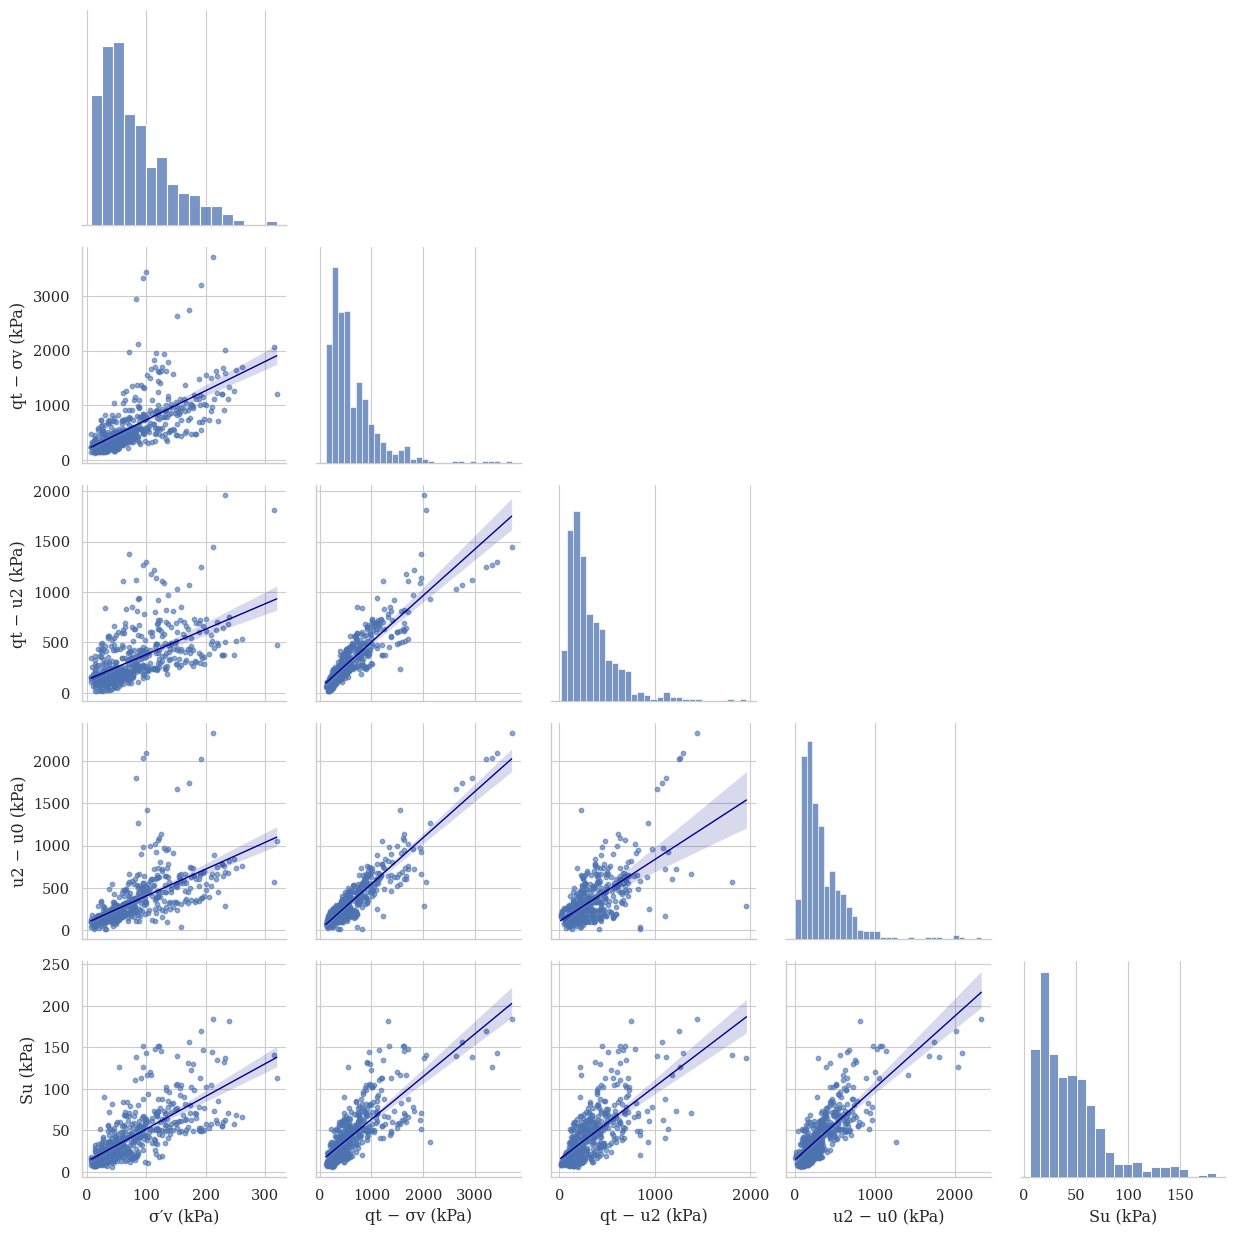

In [ ]:
# Explore the data

import seaborn as sns
import matplotlib.pyplot as plt

# Set a professional-looking theme
sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)
plt.rcParams["font.family"] = "serif"  # Optional: classic serif font for academic style

# Create the pairplot
sns.pairplot(
    df,
    kind="reg",                  # Add regression lines to scatter plots
    corner=True,                 # Only show lower triangle to reduce clutter
    plot_kws={
        "line_kws": {"color": "darkblue", "lw": 1},  # Line style
        "scatter_kws": {"alpha": 0.6, "s": 10}       # Scatter style: semi-transparent, smaller dots
    }
             # Skip diagonal plots for a cleaner layout
)

# Optional: Adjust layout
plt.tight_layout()

# Optional: Save at high resolution for publication
# plt.savefig("pairplot_journal_style.pdf", dpi=300)

plt.show()

In [ ]:
# Step 6

## The objective is to train a model to predict the undrained shear strenght  of clay soils using CPT test data
## based on the effective stress (σ′v), cone tip resistance (qt − σv), effective cone tip resistance (qt − u2) and the
# excess pore pressure (u2 − u0).

In [ ]:
# Step 7 Model Comparison
# 7.1 Define the features and target variable

X=df.drop(['Country','Su (kPa)'],axis=1) # Features
y=df['Su (kPa)'] # Target variable

# 7.2 Define test and train dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 158
number of training samples: 368


In [ ]:
# Step 8: Model 1 Linear Regression
lm=LinearRegression()
lm.fit(X_train,y_train)
lm_predict=lm.predict(X_test)

print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

rmse_lm = np.sqrt(mean_squared_error(y_test, lm_predict))
print("RMSE on testing data :", rmse_lm)

R^2 on training  data  0.6871128573630269
R^2 on testing data  0.8322753596417721
RMSE on testing data : 14.536933921476757


In [ ]:
 # WE can see the distribution of the target variable and how did the prediction do
 # So we can define a function

 def  plot_dis(y,yhat):

    plt.figure()
    ax1 = sns.kdeplot(y, color="r", label="Actual Value")
    sns.kdeplot(yhat, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

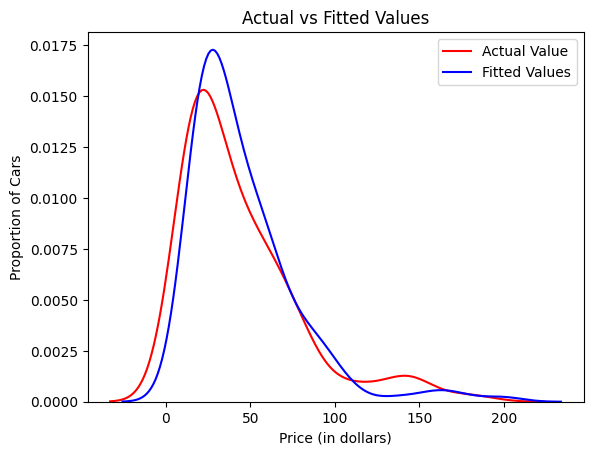

In [ ]:
plot_dis(y_test,lm_predict)

In [ ]:
# We can also see the contributionn of each feature on the prediction
# LEt's define a function to plot the coefficients
def plot_coef(X,model,name=None):


    plt.bar(X.columns[0:],abs(model.coef_[0:]))
    plt.xticks(rotation=90)
    plt.ylabel("$coefficients$")
    plt.title(name)
    plt.show()
    print("R^2 on training  data ",model.score(X_train, y_train))
    print("R^2 on testing data ",model.score(X_test,y_test))


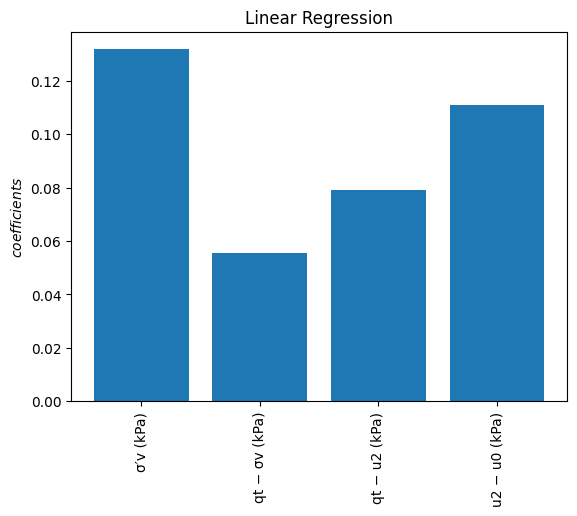

R^2 on training  data  0.6871128573630269
R^2 on testing data  0.8322753596417721


In [ ]:
plot_coef(X,lm,'Linear Regression')

In [ ]:
# Step 9: Model 1 Linear Regression + Pipeline

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe_lm=Pipeline(Input)
pipe_lm.fit(X_train,y_train)
yhat=pipe_lm.predict(X_test)

print("R^2 on training  data ",pipe_lm.score(X_train, y_train))
print("R^2 on testing data ",pipe_lm.score(X_test,y_test))

rmse_lm_pipe = np.sqrt(mean_squared_error(y_test, yhat))
print("RMSE on testing data :", rmse_lm_pipe)

R^2 on training  data  0.7353689676554773
R^2 on testing data  0.8234971818672168
RMSE on testing data : 14.91249131146152


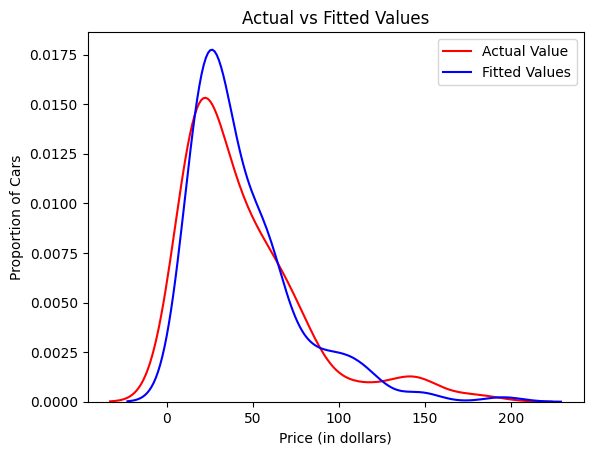

In [ ]:
plot_dis(y_test,yhat)

Text(0.5, 1.0, 'Actual vs Predicted Values')

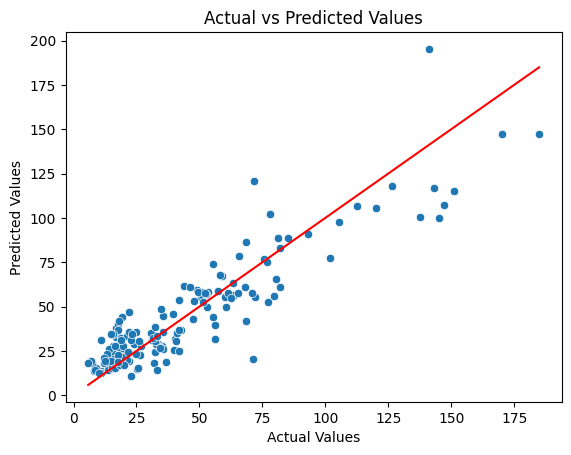

In [ ]:
sns.scatterplot(x=y_test,y=yhat)
sns.lineplot(x=y_test,y=y_test,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

In [ ]:
# Step 10: Ridge regression + Pipeline + GridsearchCV

# Define the steps for the pipeline:
# 1. 'polynomial' step: creates polynomial features (e.g., x1, x1^2, x1*x2...) to increase model capacity
#    - include_bias=False: avoids adding an extra column of 1s (since LinearRegression already adds an intercept)
#    - degree will be varied in the GridSearchCV
# 2. 'ss' step: StandardScaler ensures all features are centered and scaled before regression
# 3. 'model' step: Ridge regression is used (L2 regularization) to prevent overfitting by shrinking coefficients

Input = [
    ('polynomial', PolynomialFeatures(include_bias=False)),  # no need to specify degree here; will be set via grid search
    ('ss', StandardScaler()),
    ('model', Ridge())  # removed alpha=1 to avoid conflict with grid search below
]

# Wrap the steps into a single pipeline
pipe = Pipeline(Input)

# Define hyperparameter grid:
# - polynomial__degree: try polynomial degrees from 1 to 4
# - model__alpha: test a range of Ridge regularization strengths
#   - Small alpha ≈ less regularization (can overfit)
#   - Large alpha ≈ more regularization (can underfit)
param_grid = {
    "polynomial__degree": [1, 2, 3, 4],
    "model__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

# GridSearchCV will:
# - Train a pipeline for every combination of hyperparameters in param_grid
# - Use cross-validation (by default 5-fold) to evaluate performance
# - Select the best model based on cross-validated score
# - n_jobs=2 allows parallel processing (adjust depending on your machine)

ridge_model = GridSearchCV(pipe, param_grid, n_jobs=2)

# Fit the pipeline with training data (includes preprocessing, feature engineering, and model training)
ridge_model.fit(X_train, y_train)

# Display best model info:
print("best_score_ :", ridge_model.best_score_)       # best average cross-validation R² score
print("best_params_:", ridge_model.best_params_)      # best degree and alpha combination found

# Make predictions on the test set
ridge_predict = ridge_model.predict(X_test)

# Evaluate the model using R² score on both train and test sets
print("R^2 on training data:", ridge_model.score(X_train, y_train))
print("R^2 on testing data :", ridge_model.score(X_test, y_test))

# Calculate RMSE (Root Mean Squared Error) on test predictions
# - RMSE is in the same unit as the target variable and gives an interpretable error magnitude
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_predict))
print("RMSE on testing data:", rmse_ridge)

best_score_ : 0.6923568950240866
best_params_: {'model__alpha': 1, 'polynomial__degree': 2}
R^2 on training data: 0.731925328625628
R^2 on testing data : 0.8293699688490611
RMSE on testing data: 14.662300523314773


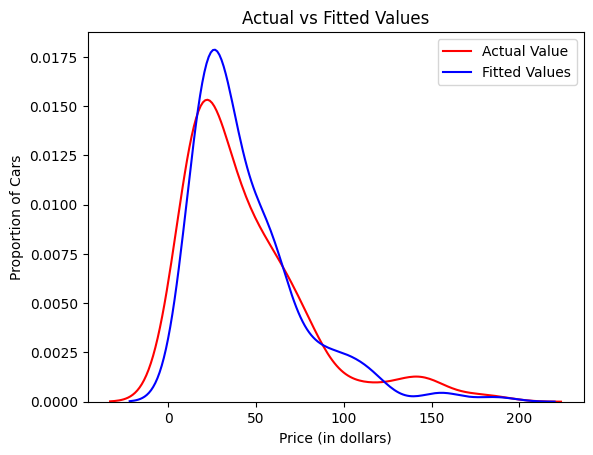

In [ ]:
plot_dis(y_test,ridge_predict)

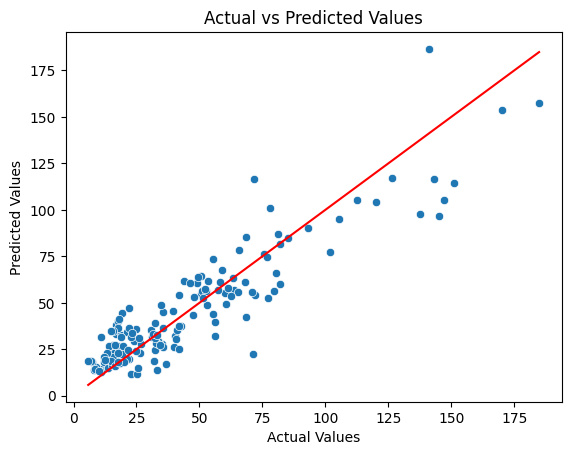

In [ ]:
sns.scatterplot(x=y_test,y=ridge_predict)
sns.lineplot(x=y_test,y=y_test,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
# Step 11 Lasso Regresssion + Pipeline+ Gridsearch

# Step 11: Lasso Regression with Polynomial Features, Scaling, and Grid Search

# Define pipeline steps:
# 1. 'polynomial' step: generate polynomial combinations of the input features (e.g., x1^2, x1*x2, etc.)
# 2. 'ss' step: standardize features to zero mean and unit variance
#    - Important for Lasso since it's sensitive to feature scales
# 3. 'model' step: apply Lasso regression (L1 regularization)
#    - L1 regularization can shrink some coefficients to zero (automatic feature selection)

Input = [
    ('polynomial', PolynomialFeatures(include_bias=False)),  # degree will be set via grid search
    ('ss', StandardScaler()),                                # standardize features
    ('model', Lasso(max_iter=10000))                         # removed alpha to avoid overriding GridSearchCV; increased max_iter for convergence
]

# Create the pipeline object
pipe = Pipeline(Input)

# Define the grid of hyperparameters to search:
# - Try different degrees for the polynomial features
# - Try different values of alpha (regularization strength)
#   - Higher alpha = stronger regularization
#   - Lower alpha = weaker regularization
param_grid = {
    "polynomial__degree": [1, 2, 3, 4],
    "model__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

# GridSearchCV:
# - Will train a model for every combination of degree and alpha
# - Will use cross-validation to find the combination with the best performance
# - n_jobs=2 uses 2 CPU cores for parallel processing (adjust as needed)
lasso_model = GridSearchCV(pipe, param_grid, n_jobs=2)

# Train the pipeline using the training data
# - Includes preprocessing and model training in one step
lasso_model.fit(X_train, y_train)

# Show the best cross-validated score and parameters found
print("best_score_ :", lasso_model.best_score_)       # Best average R² score from CV
print("best_params_:", lasso_model.best_params_)      # Best combination of degree and alpha

# Predict the target variable on the test set
lasso_predict = lasso_model.predict(X_test)

# Evaluate performance using R² score on train and test sets
print("R^2 on training data:", lasso_model.score(X_train, y_train))
print("R^2 on testing data :", lasso_model.score(X_test, y_test))

# Calculate and print Root Mean Squared Error (RMSE) on the test set
# - RMSE gives an idea of prediction error magnitude in the original units
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_predict))
print("RMSE on testing data:", rmse_lasso)

best_score_ : 0.6950342111000858
best_params_: {'model__alpha': 0.1, 'polynomial__degree': 2}
R^2 on training data: 0.7280277579270173
R^2 on testing data : 0.8389556574648354
RMSE on testing data: 14.24449699806965


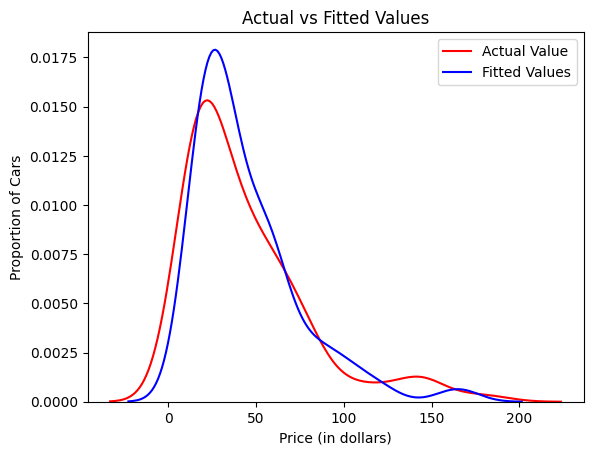

In [ ]:
plot_dis(y_test,lasso_predict)

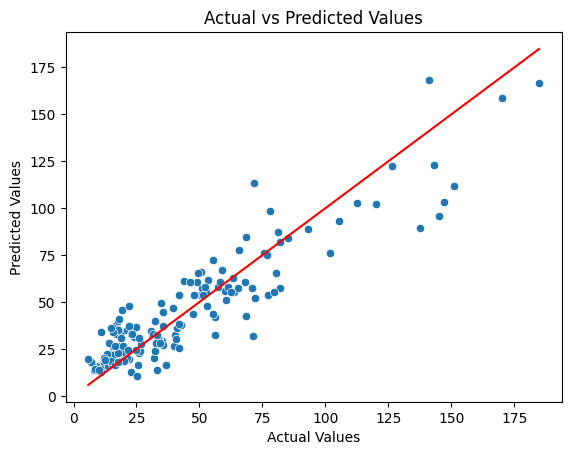

In [ ]:
sns.scatterplot(x=y_test,y=lasso_predict)
sns.lineplot(x=y_test,y=y_test,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
# Step 12: Elastic Net Regression with Polynomial Features, Scaling, and Grid Search

# Define the pipeline steps:
# 1. 'polynomial': expands the feature set with polynomial terms (interactions and powers)
# 2. 'ss': standardizes features (mean=0, std=1), critical for regularization models
# 3. 'model': ElasticNet combines Ridge (L2) and Lasso (L1) regularization
#    - Helps when you want both shrinkage and feature selection

Input = [
    ('polynomial', PolynomialFeatures(include_bias=False)),  # Degree will be tuned via GridSearchCV
    ('ss', StandardScaler()),                                # Standardizes all features
    ('model', ElasticNet(max_iter=10000))                    # max_iter ensures convergence; alpha and l1_ratio will be tuned
]

# Create the pipeline object
pipe = Pipeline(Input)

# Define the grid of hyperparameters to tune:
# - polynomial__degree: increases model complexity (nonlinearity)
# - model__alpha: controls overall regularization strength
# - model__l1_ratio: controls balance between L1 and L2 regularization
#   - l1_ratio = 0: pure Ridge (L2)
#   - l1_ratio = 1: pure Lasso (L1)
#   - 0 < l1_ratio < 1: Elastic Net

param_grid = {
    "polynomial__degree": [1, 2, 3],  # limit degree to avoid overfitting and excessive computation
    "model__alpha": [0.001, 0.01, 0.1, 1, 10],
    "model__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]  # balance between L1 and L2
}

# GridSearchCV:
# - Tries all combinations of the grid
# - Uses cross-validation to select best model
# - n_jobs=-1: use all available CPU cores for parallelism (faster)

elastic_net_model = GridSearchCV(pipe, param_grid, n_jobs=-1)

# Fit the pipeline on training data
elastic_net_model.fit(X_train, y_train)

# Report best combination of parameters and the corresponding score
print("Best cross-validated R² score:", elastic_net_model.best_score_)
print("Best parameters found:", elastic_net_model.best_params_)

# Predict on the test set using the best model
elastic_predict = elastic_net_model.predict(X_test)

# Evaluate R² score on training and testing sets
print("R^2 on training data:", elastic_net_model.score(X_train, y_train))
print("R^2 on testing data :", elastic_net_model.score(X_test, y_test))

# Calculate Root Mean Squared Error (RMSE) on test set
rmse_elastic = np.sqrt(mean_squared_error(y_test, elastic_predict))
print("RMSE on testing data:", rmse_elastic)

Best cross-validated R² score: 0.6951925441749373
Best parameters found: {'model__alpha': 0.01, 'model__l1_ratio': 0.1, 'polynomial__degree': 2}
R^2 on training data: 0.7282730689877153
R^2 on testing data : 0.8383055685381893
RMSE on testing data: 14.273218477083418


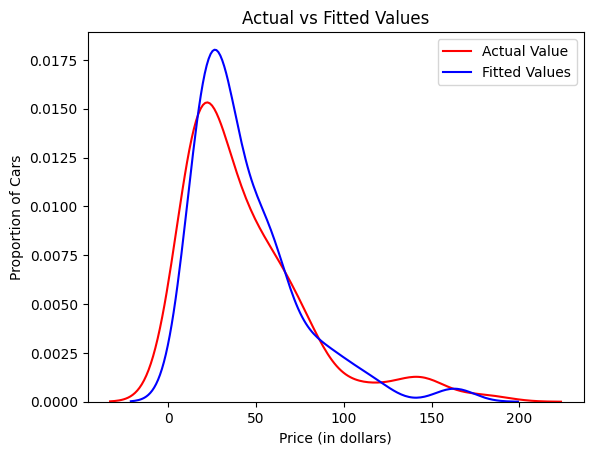

In [ ]:
plot_dis(y_test,elastic_predict)


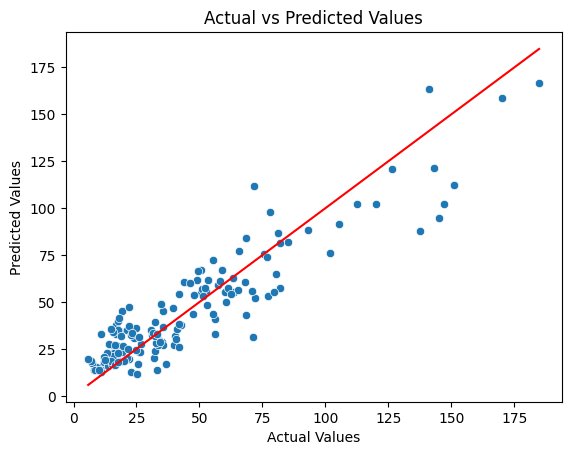

In [ ]:
sns.scatterplot(x=y_test,y=elastic_predict)
sns.lineplot(x=y_test,y=y_test,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
# Step 13: PCA + Linear Regression Pipeline + GridSearch

# The idea is to reduce dimensionality with PCA, then apply linear regression.
# We tune the number of PCA components using GridSearchCV to find the optimal balance between dimensionality and performance.

Input = [
    ('scale', StandardScaler()),               # Step 1: Scale the data
    ('pca', PCA()),                            # Step 2: PCA for dimensionality reduction
    ('model', LinearRegression())              # Step 3: Linear Regression on PCA components
]

pipe = Pipeline(Input)

param_grid = {
    'pca__n_components': [1, 2, 3, 4]        # Try reducing to different number of components
}

pca_model = GridSearchCV(pipe, param_grid, n_jobs=-1)
pca_model.fit(X_train, y_train)

print("Best cross-validated R² score:", pca_model.best_score_)
print("Best number of PCA components:", pca_model.best_params_)

pca_predict = pca_model.predict(X_test)

print("R^2 on training data:", pca_model.score(X_train, y_train))
print("R^2 on testing data :", pca_model.score(X_test, y_test))

rmse_pca = np.sqrt(mean_squared_error(y_test, pca_predict))
print("RMSE on testing data:", rmse_pca)

Best cross-validated R² score: 0.6637017693986965
Best number of PCA components: {'pca__n_components': 4}
R^2 on training data: 0.6871128573630269
R^2 on testing data : 0.8322753596417722
RMSE on testing data: 14.536933921476754



Model Comparison Summary:
               Model  R2 Train  R2 Test  RMSE Test
0  Linear Regression    0.6871   0.8323    14.5369
1  Linear + Pipeline    0.7354   0.8235    14.9125
2              Ridge    0.7319   0.8294    14.6623
3              Lasso    0.7280   0.8390    14.2445
4         ElasticNet    0.7283   0.8383    14.2732
5       PCA + Linear    0.6871   0.8323    14.5369


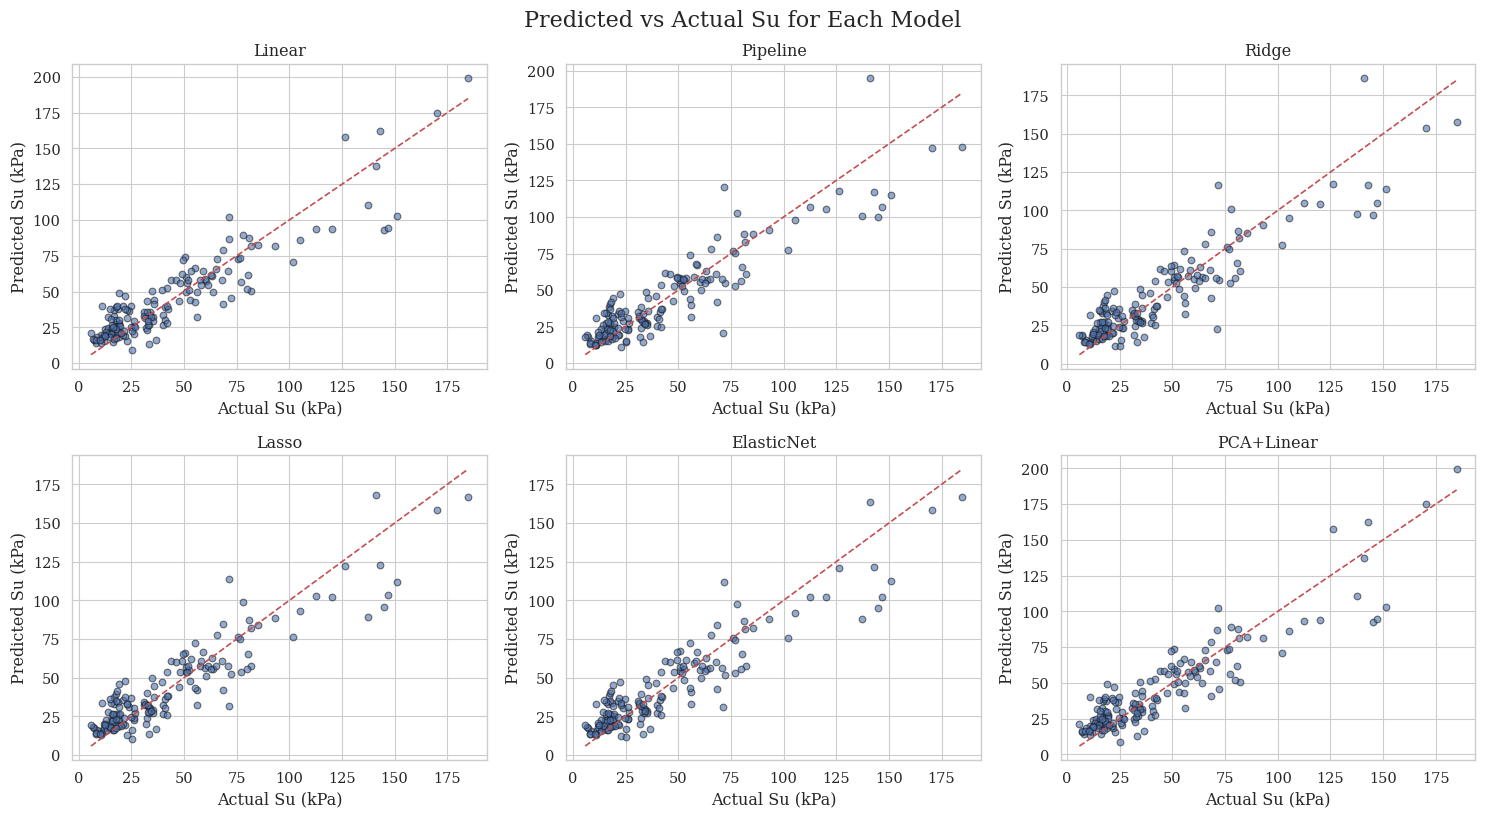

In [ ]:
# Step 14: Summary Table and Prediction Plots

# Create a summary DataFrame for comparison
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Linear + Pipeline', 'Ridge', 'Lasso', 'ElasticNet', 'PCA + Linear'],
    'R2 Train': [
        lm.score(X_train, y_train),
        pipe_lm.score(X_train, y_train),
        ridge_model.score(X_train, y_train),
        lasso_model.score(X_train, y_train),
        elastic_net_model.score(X_train, y_train),
        pca_model.score(X_train, y_train)
    ],
    'R2 Test': [
        lm.score(X_test, y_test),
        pipe_lm.score(X_test, y_test),
        ridge_model.score(X_test, y_test),
        lasso_model.score(X_test, y_test),
        elastic_net_model.score(X_test, y_test),
        pca_model.score(X_test, y_test)
    ],
    'RMSE Test': [
        rmse_lm,
        rmse_lm_pipe,
        rmse_ridge,
        rmse_lasso,
        rmse_elastic,
        rmse_pca
    ]
})

print("\nModel Comparison Summary:")
print(results_df.round(4))

# Step 15: Plot Predicted vs Actual Values

plt.figure(figsize=(15, 8))

models = {
    'Linear': lm_predict,
    'Pipeline': yhat,
    'Ridge': ridge_predict,
    'Lasso': lasso_predict,
    'ElasticNet': elastic_predict,
    'PCA+Linear': pca_predict
}

for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, preds, alpha=0.6, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(name)
    plt.xlabel("Actual Su (kPa)")
    plt.ylabel("Predicted Su (kPa)")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Predicted vs Actual Su for Each Model", y=1.02, fontsize=16)
plt.show()

# Step 16: Conclusion

# Based on the above results, you can conclude:
# - The best performing model (based on R2 and RMSE) is likely Ridge or ElasticNet, as they provide a good bias-variance trade-off.
# - PCA-based regression is helpful for dimensionality reduction but may lose some explanatory power.
# - Pipeline + Polynomial improves baseline Linear Regression but can overfit without regularization.
#
# Future improvements could include:
# - Using more complex models (e.g., SVR, Random Forest, XGBoost)
# - Performing feature importance analysis
# - Tuning polynomial interactions more carefully
# - Cross-validation across countries or regions if spatial effects exist


# Some other ideas - draft code

Dataset shape: (526, 5)
        σ′v (kPa)  qt − σv (kPa)  qt − u2 (kPa)  u2 − u0 (kPa)    Su (kPa)
count  526.000000     526.000000     526.000000     526.000000  526.000000
mean    80.551293     623.386974     329.619080     341.858370   44.085214
std     56.924670     488.191180     257.539478     292.360529   32.409188
min      7.270000     116.700200      13.916880       9.710750    5.829120
25%     38.107500     307.615100     153.002900     157.434825   20.091705
50%     62.995000     476.743650     246.883000     259.027300   35.574210
75%    113.107500     788.618825     428.035250     447.431500   57.498158
max    319.350000    3707.052000    1959.996000    2330.433000  184.884000

📊 Ridge Regression
R2 score (train): 0.6866833636206473
R2 score (test) : 0.8303058668452741
RMSE (test): 14.62203420536688


/tmp/ipython-input-56-3242978904.py:57: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Serif.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)


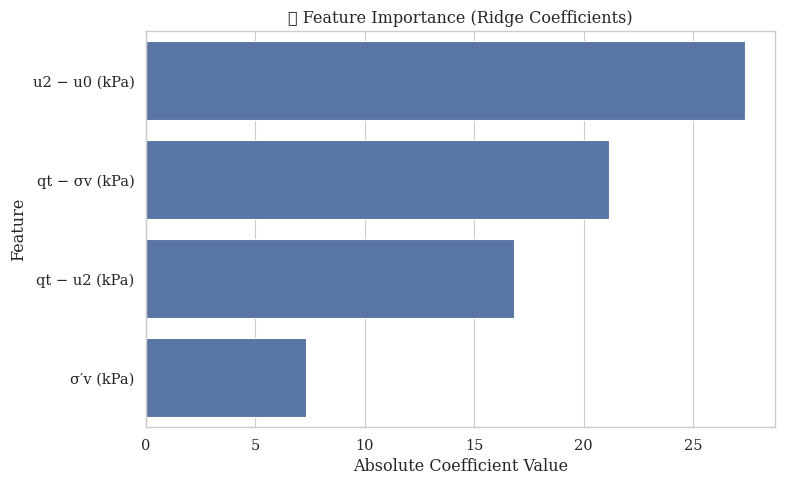


📊 Lasso Regression
R2 score (train): 0.6858839815969291
R2 score (test) : 0.8278318918254592
RMSE (test): 14.728236027784122
Non-zero coefficients: 4


/tmp/ipython-input-56-3242978904.py:81: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Serif.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)


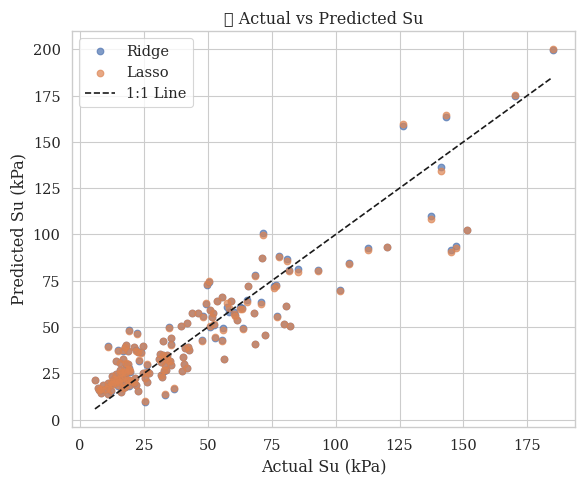

In [ ]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
from sklearn.inspection import permutation_importance

# 2. Load Dataset
url = "https://raw.githubusercontent.com/cysorianoc/IBM_MACHINE_LEARNING_COURSE_2/main/Su_CPT_WORLD.csv"
df = pd.read_csv(url)

# 3. Clean and Prepare Data
# Drop non-numeric feature 'Country' as it is not used in regression
df = df.drop(columns=['Country'])

# Show summary
print("Dataset shape:", df.shape)
print(df.describe())

# 4. Define Features and Target
X = df.drop(columns=['Su (kPa)'])
y = df['Su (kPa)']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Preprocessing Pipeline
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Fit Ridge Regression (used in thesis)
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("\n📊 Ridge Regression")
print("R2 score (train):", ridge.score(X_train_scaled, y_train))
print("R2 score (test) :", ridge.score(X_test_scaled, y_test))
print("RMSE (test):", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

# 8. Feature Importance Analysis (via absolute coefficients)
coefs = pd.Series(np.abs(ridge.coef_), index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=coefs.values, y=coefs.index)
plt.title("🔍 Feature Importance (Ridge Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 9. Compare with Lasso (for sparsity insight)
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("\n📊 Lasso Regression")
print("R2 score (train):", lasso.score(X_train_scaled, y_train))
print("R2 score (test) :", lasso.score(X_test_scaled, y_test))
print("RMSE (test):", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Non-zero coefficients:", np.sum(lasso.coef_ != 0))

# 10. Predicted vs Actual Plot
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_ridge, alpha=0.7, label='Ridge')
plt.scatter(y_test, y_pred_lasso, alpha=0.7, label='Lasso')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='1:1 Line')
plt.xlabel("Actual Su (kPa)")
plt.ylabel("Predicted Su (kPa)")
plt.title("📈 Actual vs Predicted Su")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(



📊 Summary of Model Performance:

       Part   Method            R2          MAE         RMSE    merror(%)  \
0  Training      ANN      0.691399    11.908991    17.189692    33.597993   
1   Testing      ANN      0.861227     9.588969    13.222882    32.240614   
2  Training      SVM      0.434392    14.262787    23.271644    37.356238   
3   Testing      SVM      0.428412    15.399092    26.835890    40.982486   
4  Training      GPR -11572.533235  1085.148994  3328.911826  1882.615780   
5   Testing      GPR -21686.875007  1279.566139  5227.365683  1957.145072   
6  Training       RF      0.657562    12.336923    18.107577    33.318957   
7   Testing       RF      0.823858    10.334726    14.897239    31.457935   
8  Training  XGBoost      0.606067    12.730840    19.421402    34.946224   
9   Testing  XGBoost      0.799223    10.814318    15.904926    32.107679   

      StDerror  
0    17.188536  
1    13.201298  
2    22.462918  
3    26.042734  
4  3327.720085  
5  5204.274761  

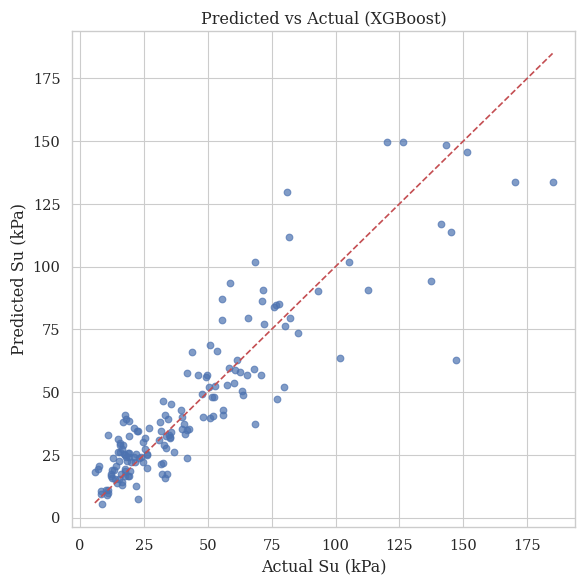

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor


# 2. Load Dataset
url = "https://raw.githubusercontent.com/cysorianoc/IBM_MACHINE_LEARNING_COURSE_2/main/Su_CPT_WORLD.csv"
df = pd.read_csv(url)
# Step 2: Load the data (assumed already in memory as df)
# NOTE: You can replace this line with df = pd.read_csv(...) if needed
# We drop the 'Country' column as it is categorical and not used in the thesis model
X = df.drop(['Country', 'Su (kPa)'], axis=1)  # Features
y = df['Su (kPa)']  # Target

# Step 3: Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define the machine learning models
models = {
    "ANN": MLPRegressor(hidden_layer_sizes=(100,), max_iter=5000, random_state=42),
    "SVM": SVR(kernel='rbf'),
    "GPR": GaussianProcessRegressor(),
    "RF": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Step 6: Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 7: Evaluate each model and store the results
results = []

for name, model in models.items():
    # Cross-validation prediction on training set
    y_train_pred = cross_val_predict(model, X_train_scaled, y_train, cv=kf)

    # Fit the model and predict on test set
    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)

    # Compute training metrics (using CV predictions)
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    std_train = np.std(y_train - y_train_pred)

    # Compute testing metrics
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    std_test = np.std(y_test - y_test_pred)

    # Store results for both training and testing
    results.extend([
        ["Training", name, r2_train, mae_train, rmse_train, mape_train, std_train],
        ["Testing", name, r2_test, mae_test, rmse_test, mape_test, std_test]
    ])

# Step 8: Create a summary DataFrame
results_df = pd.DataFrame(
    results,
    columns=["Part", "Method", "R2", "MAE", "RMSE", "merror(%)", "StDerror"]
)

# Step 9: Display summary in a nice format
print("\n📊 Summary of Model Performance:\n")
print(results_df)


# Optional: Plotting predicted vs actual values for the best model (e.g., XGBoost)
best_model = XGBRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train_scaled, y_train)
y_pred_test = best_model.predict(X_test_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Su (kPa)")
plt.ylabel("Predicted Su (kPa)")
plt.title("Predicted vs Actual (XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()
